#Install Dependencies

This cell installs the required packages for the hackathon project, including `nx-arangodb`, `cugraph` (for GPU acceleration), LangChain libraries, and `arango-datasets`.


In [ ]:
!pip install nx-arangodb
!pip install cugraph-cu12 --extra-index-url=https://pypi.nvidia.com
!pip install --upgrade langchain langchain-community langchain-openai langgraph
!pip install arango-datasets

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 53.0 MB/s eta 0:00:00
  Using cached cuda_python-12.8.0-py3-none-any.whl.metadata (15 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 145.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.9/133.9 kB 100.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 GB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 192.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 851.2/851.2 kB 210.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.5/293.5 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 203.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 204.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.7/5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.1/415.1 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.40
    Uninstalling langchain-core-0.3.40:
      Successfully uninstalled langchain-core-0.3.40
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.19
    Uninstalling langchain-0.3.19:
      Successfully uninstalled langchain-0.3.19


# Check GPU and CUDA Setup

This cell checks for GPU availability by running `nvidia-smi` and displays the CUDA version using `nvcc --version`. It also tests whether cuGraph is installed.


In [ ]:
!nvidia-smi
!nvcc --version
try:
    import cugraph
    print("cuGraph is installed.")
except ImportError:
    print("cuGraph is not installed.")


Thu Mar  6 04:28:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Import Required Modules

In this cell, we import all the necessary Python libraries and modules required for our project. These include:
- **NetworkX and nx-arangodb** for graph processing and integrating with ArangoDB.
- **ArangoDB Client and Datasets** for connecting to and interacting with our ArangoDB database.
- **Pandas, NumPy, Matplotlib, and Random** for data manipulation and visualization.
- **Regular Expressions (re) and OS** for text processing and environment configuration.
- **LangChain, LangGraph, and related modules** for building the agent and query processing.

In [ ]:


import networkx as nx
import nx_arangodb as nxadb

from arango import ArangoClient

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
import re
import os

from langgraph.prebuilt import create_react_agent
from langgraph.checkpoint.memory import MemorySaver
from langchain_openai import ChatOpenAI
from langchain_community.graphs import ArangoGraph
from langchain_community.chains.graph_qa.arangodb import ArangoGraphQAChain
from langchain_core.tools import tool
from arango import ArangoClient
from arango_datasets import Datasets



# Connect to ArangoDB and Load Synthea Dataset

In this cell, we:
- Connect to the ArangoDB instance.
- Log in as the root user and create/use the "synthea_db" database.
- Load the Synthea dataset and display dataset information.
- Retrieve collections and set up the graph from the Synthea dataset.

In [ ]:
# Connect to ArangoDB
client = ArangoClient(hosts="https://7ff406b7fac3.arangodb.cloud:8529")

# Log in as root user
sys_db = client.db('_system', username="root", password="wwl7Xv0syhaCugcGmZ7f")


# Create a new database (if it doesn't already exist)
if not sys_db.has_database("synthea_db"):
    sys_db.create_database("synthea_db")

# Connect to the new database
db = client.db("synthea_db", username="root", password="wwl7Xv0syhaCugcGmZ7f")
print("Database Created & Connected:", db)

datasets = Datasets(db)
print(datasets.dataset_info("SYNTHEA_P100"))
# List collections
collections = db.collections()
print("Collections in the database:", collections)

# Check for non-system collections
user_collections = [col["name"] for col in collections if not col["system"]]

graph = db.graph("SYNTHEA_P100")
print(graph)
# Access the vertex and edge collections
vertex_collections = graph.vertex_collections()  # List of vertex collections
edge_definitions = graph.edge_definitions()
edge_collections = [edge["edge_collection"] for edge in edge_definitions] # List of edge collections


Output()

Database Created & Connected: <StandardDatabase synthea_db>


{'files': 41, 'edges': [{'collection_name': 'patients_to_immunizations', 'files': ['https://arangodb-dataset-library-ml.s3.amazonaws.com/synthea_p100/edge_collection/patients_to_immunizations_3b4a9f4c6bbd45611715467144fd2b4d.data.json']}, {'collection_name': 'patients_to_encounters', 'files': ['https://arangodb-dataset-library-ml.s3.amazonaws.com/synthea_p100/edge_collection/patients_to_encounters_4d7fa7310d65555f8eb9525490d7be94.data.json']}, {'collection_name': 'encounters_to_observations', 'files': ['https://arangodb-dataset-library-ml.s3.amazonaws.com/synthea_p100/edge_collection/encounters_to_observations_ebfd113faba7cad45697c58661cfff59.data.json']}, {'collection_name': 'patients_to_devices', 'files': ['https://arangodb-dataset-library-ml.s3.amazonaws.com/synthea_p100/edge_collection/patients_to_devices_2aba93faa39a1ff1c525fb26f6e2c737.data.json']}, {'collection_name': 'patients_to_imaging_studies', 'files': ['https://arangodb-dataset-library-ml.s3.amazonaws.com/synthea_p100/edge

# Build NetworkX Graph

This cell initializes an empty NetworkX graph and populates it by iterating over the vertex and edge collections from the Synthea dataset in ArangoDB.  
- **Nodes:** Each document from the vertex collections is added as a node with its attributes.  
- **Edges:** Each document from the edge collections is added as an edge, preserving its attributes.  
Finally, the cell prints the total number of nodes and edges in the constructed NetworkX graph.

In [ ]:
# Initialize an empty NetworkX graph
G = nx.Graph()

# Add vertices (nodes) from ArangoDB to NetworkX
for vertex_collection in graph.vertex_collections():
    cursor = db.collection(vertex_collection).all()
    for doc in cursor:
        G.add_node(doc["_id"], **doc)  # Add the node with attributes

# Add edges from ArangoDB to NetworkX
for edge_collection in edge_collections:
    cursor = db.collection(edge_collection).all()
    for edge in cursor:
        G.add_edge(edge["_from"], edge["_to"], **edge)  # Add edges with attributes


print(f"NetworkX Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

NetworkX Graph has 145514 nodes and 311701 edges.


# Visualize a Subgraph

This cell extracts a small subgraph (e.g., the first 500 nodes) from the full NetworkX graph and visualizes it using Matplotlib.  
This helps to quickly inspect the graph structure and verify that the data has been loaded correctly.

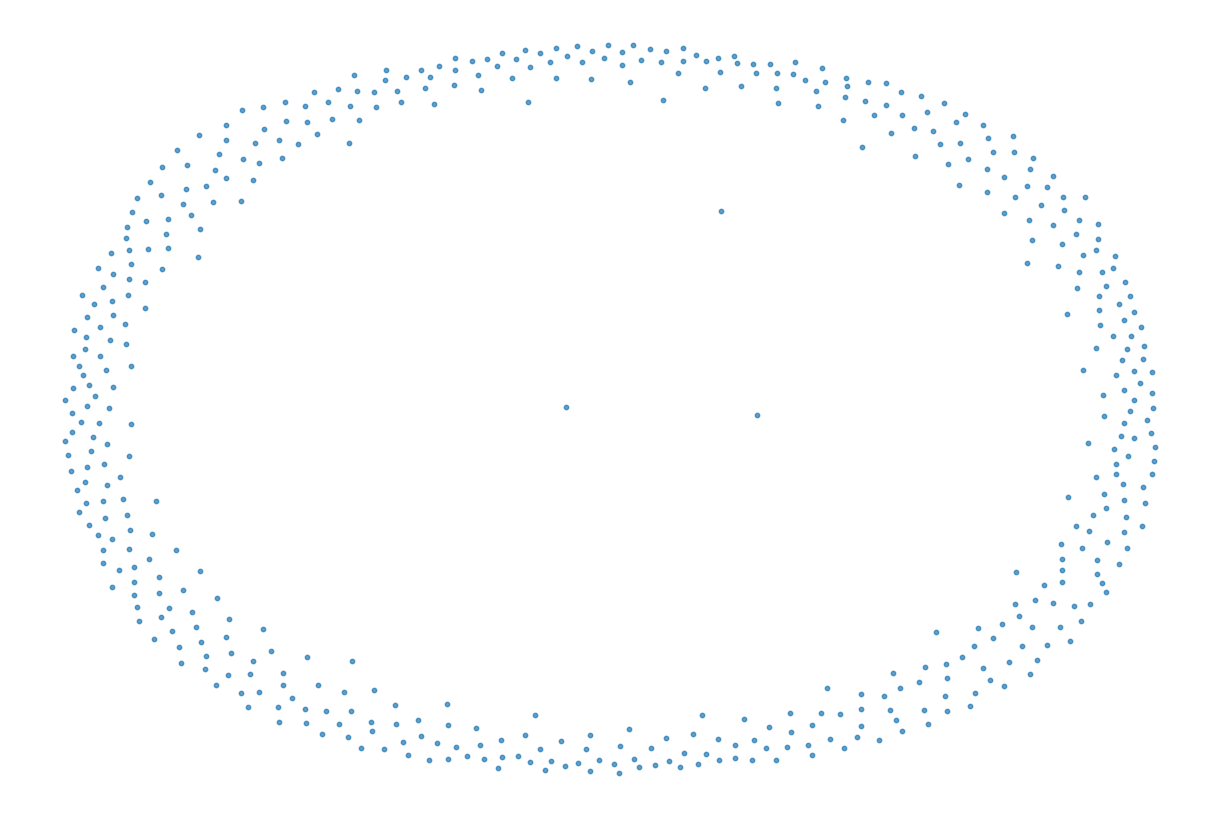

In [ ]:


sub_G = G.subgraph(list(G.nodes)[:500])  # Take a small portion (e.g., 500 nodes)
plt.figure(figsize=(12, 8))
nx.draw(sub_G, node_size=10, edge_color="gray", alpha=0.7, with_labels=False)
plt.show()

# Set Up ArangoGraph and LLM

In this cell, we:
- Create an ArangoGraph wrapper using `nx-arangodb` to connect our database graph.
- Initialize the ArangoGraph object for LangChain to enable AQL-based queries.
- Set up our OpenAI API key and create an LLM instance using ChatOpenAI.

In [ ]:
# Create the ArangoGraph wrapper (ensure your db variable is already defined)
G_adb = nxadb.Graph(name="SYNTHEA_P100", db=db)
print(G_adb)  # Confirm connection

# Create the ArangoGraph for LangChain
arango_graph = ArangoGraph(db)
print("ArangoGraph schema:", arango_graph.schema)

# Set up your OpenAI API key and LLM instance
os.environ["OPENAI_API_KEY"] = "sk..." # Replace with your API key
llm = ChatOpenAI(temperature=0, model_name="gpt-4o")



[04:36:18 +0000] [INFO]: Graph 'SYNTHEA_P100' exists.
INFO:nx_arangodb:Graph 'SYNTHEA_P100' exists.
[04:36:18 +0000] [INFO]: Default node type set to 'allergies'
INFO:nx_arangodb:Default node type set to 'allergies'


Graph named 'SYNTHEA_P100' with 145514 nodes and 311701 edges
ArangoGraph schema: {'Graph Schema': [{'graph_name': 'SYNTHEA_P100', 'edge_definitions': [{'edge_collection': 'encounters_to_allergies', 'from_vertex_collections': ['encounters'], 'to_vertex_collections': ['allergies']}, {'edge_collection': 'encounters_to_careplans', 'from_vertex_collections': ['encounters'], 'to_vertex_collections': ['careplans']}, {'edge_collection': 'encounters_to_conditions', 'from_vertex_collections': ['encounters'], 'to_vertex_collections': ['conditions']}, {'edge_collection': 'encounters_to_devices', 'from_vertex_collections': ['encounters'], 'to_vertex_collections': ['devices']}, {'edge_collection': 'encounters_to_imaging_studies', 'from_vertex_collections': ['encounters'], 'to_vertex_collections': ['imaging_studies']}, {'edge_collection': 'encounters_to_immunizations', 'from_vertex_collections': ['encounters'], 'to_vertex_collections': ['immunizations']}, {'edge_collection': 'encounters_to_medicatio

# Node Mapping and Caching Functions

In this cell, we build helper functions that:
- Create a mapping from node indices to actual node IDs (using the `G_adb` graph).
- Provide a function (`node_mapping_tool`) to replace textual references (e.g., "Node 0") with the actual node ID.
- Extract schema context from the ArangoDB graph.
- Set up a caching mechanism with versioning (using `CACHE_VERSION`) to store and retrieve results from heavy computations.

In [ ]:
# import re

# Build a mapping from node indices to actual node IDs.
node_list = list(G_adb.nodes())
node_map = {str(i): node for i, node in enumerate(node_list)}

def node_mapping_tool(query: str) -> str:
    """
    Maps references like "Node 0" in the query to the actual node ID
    using a pre-built node map.

    For example, "Node 0" will be replaced with the corresponding node ID from `node_map`.
    """
    def replace_node(match):
        index = match.group(1)
        return node_map.get(index, f"Node {index}")
    new_query = re.sub(r"Node (\d+)", replace_node, query)
    return new_query

def get_schema_context() -> str:
    """
    Returns a formatted string describing the graph's schema (vertex and edge collections).

    Uses the global variable 'graph' which should be your ArangoDB graph object.
    """
    # Try to extract vertices
    try:
        if callable(graph.vertex_collections):
            vertices = ", ".join(graph.vertex_collections())
        else:
            vertices = ", ".join(graph.vertex_collections)
    except Exception as e:
        vertices = "Unknown"

    # Try to extract edges (using edge_definitions)
    try:
        if callable(graph.edge_definitions):
            edges = ", ".join([edge["edge_collection"] for edge in graph.edge_definitions()])
        else:
            edges = ", ".join([edge["edge_collection"] for edge in graph.edge_definitions])
    except Exception as e:
        edges = "Unknown"

    return f"Vertices: {vertices}\nEdges: {edges}"

CACHE_VERSION = "v2"
cache = {}

def cached_tool(tool_func, query: str) -> str:
    """
    Returns the cached result for a given tool and query if available.
    Otherwise, calls the tool, caches, and returns the result.
    """
    tool_name = getattr(tool_func, "__name__", "unknown_tool")
    key = f"{tool_name}:{CACHE_VERSION}:{query}"
    if key in cache:
        print(f"Using cached result for {key}")
        return cache[key]
    result = tool_func(query)
    cache[key] = result
    return result


# Specialized Tools for Analytics

This cell defines a set of specialized tools that perform various graph analytics on our Synthea dataset. These tools include:

- **compute_pagerank**: Computes PageRank using NetworkX.
- **compute_pagerank_cugraph**: Computes PageRank using GPU acceleration via cuGraph (with mapping for non-numeric node IDs).
- **compute_connectivity**: Calculates the number of connected components in the graph.
- **compute_average_degree**: Computes the average degree (number of connections) for nodes.
- **detect_communities_girvan_newman**: Detects communities using the Girvan-Newman algorithm and returns a sample from the top-level communities.
- **compute_influential_doctors_chronic**: Filters the graph for provider nodes (doctors) and computes PageRank to find the most influential doctor treating chronic conditions.
- **compute_treatment_path**: Extracts a common treatment path for diabetes by traversing condition, patient, encounter, and medication nodes.

These tools help us address both complex and hybrid queries, combining direct graph traversal with advanced analytics.


In [ ]:
from langchain_core.tools import tool

@tool
def compute_pagerank(query: str) -> str:
    """
    Computes PageRank for the graph `G_adb` and returns the highest PageRank node and its value.

    The function ignores the query text (you can extend this later to parse parameters).
    """
    import networkx as nx
    try:
        pr = nx.pagerank(G_adb)
        # Find the node with the maximum PageRank value
        max_node = max(pr, key=pr.get)
        max_value = pr[max_node]
        return f"Highest PageRank node is {max_node} with a value of {max_value:.4f}."
    except Exception as e:
        return f"Error computing PageRank: {e}"

@tool
def compute_pagerank_cugraph(query: str) -> str:
    """
    Computes PageRank for the graph using cuGraph for GPU acceleration.
    This tool maps non-numeric node IDs to integers (as cuGraph requires numeric IDs),
    computes PageRank, and then maps the result back to the original node IDs.
    Falls back to the NetworkX-based PageRank if an error occurs.
    """
    try:
        import cugraph
        import cudf

        # Convert the NetworkX graph to an edge list.
        edges = [(u, v) for u, v in G_adb.edges()]
        df_edges = cudf.DataFrame(edges, columns=["src", "dst"])

        # Get unique nodes from the edge list.
        unique_nodes = list(set(df_edges['src'].to_pandas().tolist() +
                                df_edges['dst'].to_pandas().tolist()))
        # Create mapping: string -> integer.
        mapping = {node: i for i, node in enumerate(unique_nodes)}
        reverse_mapping = {i: node for node, i in mapping.items()}

        # Map the edge list to numeric IDs.
        df_edges['src'] = df_edges['src'].map(mapping)
        df_edges['dst'] = df_edges['dst'].map(mapping)

        # Build a cuGraph graph using the mapped edge list.
        G_cu = cugraph.Graph.from_cudf_edgelist(df_edges, source="src", destination="dst")

        # Compute PageRank using cuGraph.
        pr_df = cugraph.pagerank(G_cu, alpha=0.85)
        # Convert the result to a dictionary.
        pr_dict = pr_df.set_index("vertex")["pagerank"].to_pandas().to_dict()
        # Map numeric IDs back to original string IDs.
        pr_dict_str = {reverse_mapping.get(k, k): v for k, v in pr_dict.items()}
        max_node = max(pr_dict_str, key=pr_dict_str.get)
        max_value = pr_dict_str[max_node]
        return f"(cuGraph) Highest PageRank node is {max_node} with a value of {max_value:.4f}."
    except Exception as e:
        fallback_result = compute_pagerank(query)
        return f"cuGraph PageRank error: {e}\nFallback: {fallback_result}"



@tool
def compute_connectivity(query: str) -> str:
    """
    Computes the number of connected components in G_adb and returns a description.
    """
    import networkx as nx
    try:
        num_components = nx.number_connected_components(G_adb)
        if num_components == 1:
            return "The network is fully connected."
        else:
            return f"The network has {num_components} connected components, indicating it is not fully connected."
    except Exception as e:
        return f"Error computing connectivity: {e}"

@tool
def compute_average_degree(query: str) -> str:
    """
    Computes the average degree of nodes in the graph G_adb.
    """
    import networkx as nx
    try:
        degrees = [d for n, d in G_adb.degree()]
        avg_degree = sum(degrees) / len(degrees)
        return f"The average degree of nodes is approximately {avg_degree:.2f}."
    except Exception as e:
        return f"Error computing average degree: {e}"

@tool
def detect_communities_girvan_newman(query: str) -> str:
    """
    Detects communities using the Girvan-Newman algorithm.
    Returns a sample of nodes from the top-level communities.
    """
    try:
        communities_generator = nx.community.girvan_newman(G)
        top_level_communities = next(communities_generator)
        sorted_communities = sorted(map(sorted, top_level_communities))
        sample = [str(community[:3]) for community in sorted_communities[:3]]
        return f"Detected communities: " + " | ".join(sample)
    except Exception as e:
        return f"Error detecting communities: {e}"


@tool
def compute_influential_doctors_chronic(query: str) -> str:
    """
    Computes the most influential doctor (provider) treating chronic conditions.

    This tool filters the full graph to focus on nodes representing providers
    (assuming their IDs start with 'providers/') using the NetworkX graph 'G'
    and then computes PageRank on that subgraph.
    """
    try:
        # Use 'G', the NetworkX graph loaded from ArangoDB
        providers = [node for node in G.nodes() if str(node).startswith("providers/")]
        if not providers:
            return "No provider nodes found in the network."

        # Create a subgraph from the NetworkX graph 'G' with only provider nodes.
        subG = G.subgraph(providers)
        if subG.number_of_nodes() == 0:
            return "Provider subgraph is empty."

        # Compute PageRank on the provider subgraph.
        pr = nx.pagerank(subG)
        max_provider = max(pr, key=pr.get)
        max_value = pr[max_provider]
        return f"The most influential doctor treating chronic conditions is {max_provider} with a PageRank value of {max_value:.4f}."
    except Exception as e:
        return f"Error computing influential doctors for chronic conditions: {e}"


@tool
def compute_treatment_path(query: str) -> str:
    """
    Computes a common treatment path for diabetes by scanning the graph.

    This implementation:
      1. Identifies condition nodes (IDs starting with "conditions/") whose "name" attribute contains "diabetes".
      2. Finds a patient node connected to that condition.
      3. Finds an encounter node connected to that patient.
      4. Finds a medication node connected to that encounter.

    Returns a sample treatment path as:
      "condition_node -> patient_node -> encounter_node -> medication_node"
    """
    try:
        # Step 1: Identify diabetes-related condition nodes.
        diabetes_conditions = [
            node for node in G.nodes()
            if str(node).startswith("conditions/") and "diabetes" in G.nodes[node].get("name", "").lower()
        ]
        if not diabetes_conditions:
            return "No diabetes-related condition nodes found in the network."
        condition_node = diabetes_conditions[0]

        # Step 2: Find patient nodes connected to the condition.
        condition_neighbors = list(G.neighbors(condition_node))
        diabetes_patients = [n for n in condition_neighbors if str(n).startswith("patients/")]
        if not diabetes_patients:
            return "No patient nodes associated with diabetes condition found."
        patient_node = diabetes_patients[0]

        # Step 3: From the patient, get an encounter.
        patient_neighbors = list(G.neighbors(patient_node))
        encounters = [n for n in patient_neighbors if str(n).startswith("encounters/")]
        if not encounters:
            return "No encounter nodes found for the patient with diabetes."
        encounter_node = encounters[0]

        # Step 4: From the encounter, get a medication.
        encounter_neighbors = list(G.neighbors(encounter_node))
        medications = [n for n in encounter_neighbors if str(n).startswith("medications/")]
        if not medications:
            return "No medication nodes found for the encounter."
        medication_node = medications[0]

        return f"A common treatment path for diabetes: {condition_node} -> {patient_node} -> {encounter_node} -> {medication_node}"
    except Exception as e:
        return f"Error computing treatment path: {e}"



# Core Query Tools (Text-to-AQL & Text-to-NX)

This cell defines two core tools for query processing:

1. **text_to_aql_to_text**  
   - This tool uses LangChain’s ArangoGraphQAChain to convert natural language queries into AQL, executes the query on the ArangoDB graph, and returns the result as text.

2. **text_to_nx_algorithm_to_text**  
   - This tool uses a few-shot example approach with ChatOpenAI to generate Python code for analyzing the NetworkX graph (`G_adb`).  
   - It executes the generated code and returns a concise answer based on the computed result.


In [ ]:
from langchain_openai import ChatOpenAI
from langchain_community.chains.graph_qa.arangodb import ArangoGraphQAChain

@tool
def text_to_aql_to_text(query: str) -> str:
    """
    Translates a natural language query into AQL, executes it on the ArangoGraph,
    and returns the result as text.
    """
    llm_inner = ChatOpenAI(temperature=0, model_name="gpt-4o")
    chain = ArangoGraphQAChain.from_llm(
        llm=llm_inner,
        graph=arango_graph,
        verbose=False,
        allow_dangerous_requests=True
    )
    result = chain.invoke(query)
    try:
        result = chain.invoke(query)
        return str(result["result"])
    except Exception as e:
        return f"Error in AQL chain: {e}"

@tool
def text_to_nx_algorithm_to_text(query: str) -> str:
    """
    Generates and executes Python code using NetworkX on G_adb to answer a graph query,
    then returns a concise answer based on the computed result.
    """
    llm_inner = ChatOpenAI(temperature=0, model_name="gpt-4o")

    # Use the helper function to provide schema context.
    schema_context = get_schema_context()

    few_shot_examples = """
Example 1:
Query: "What is the average degree of nodes?"
Generated Code:
# Calculate the average degree
degrees = [d for n, d in G_adb.degree()]
FINAL_RESULT = sum(degrees)/len(degrees)

Example 2:
Query: "Are there isolated nodes?"
Generated Code:
# Find isolated nodes
isolated = [n for n, d in G_adb.degree() if d == 0]
FINAL_RESULT = f"Yes, there are {len(isolated)} isolated nodes." if isolated else "No isolated nodes found."
"""

    code_prompt = f"""
{schema_context}
{few_shot_examples}
Now, answer the following query using the NetworkX Graph `G_adb`:
{query}
Generate Python code that calculates the answer and stores it in a variable named FINAL_RESULT.
Provide only the Python code (no extra text).
"""
    generated_code = llm_inner.invoke(code_prompt).content
    cleaned_code = re.sub(r"^```python\n|```$", "", generated_code, flags=re.MULTILINE).strip()

    print("Generated enhanced NetworkX code:")
    print("-" * 40)
    print(cleaned_code)
    print("-" * 40)

    # Execute the generated code
    global_vars = {"G_adb": G_adb, "nx": nx}
    local_vars = {}
    try:
        exec(cleaned_code, global_vars, local_vars)
    except Exception as e:
        return f"EXEC ERROR: {e}"

    FINAL_RESULT = local_vars.get("FINAL_RESULT", "No result produced.")
    return str(FINAL_RESULT)






# Hybrid Query Execution & Query Routing

In this cell, we define the hybrid query execution tool that combines AQL traversal and NetworkX analytics to produce context-rich responses. We then build the list of all tools and set up the query routing functions. The routing logic uses regular expressions and caching to direct queries to the appropriate tool based on keywords. This includes dedicated handling for treatment path queries, chronic condition/influential doctor queries, and other analytics queries.


In [ ]:
from langgraph.prebuilt import create_react_agent


@tool
def hybrid_query_execution(query: str) -> str:
    """
    Handles complex queries by dynamically combining AQL traversal and NetworkX/cuGraph analytics
    to generate a contextually rich natural language response.

    For example, a query like "Find the most influential person in the network" will first run an AQL
    traversal (to gather direct connections or relevant subgraph data) and then perform graph analytics
    (such as PageRank) to rank the results. Finally, it synthesizes the results into a concise answer.
    """
    llm_inner = ChatOpenAI(temperature=0, model_name="gpt-4o")

    # Step 1: Retrieve data using AQL (simulate AQL traversal)
    aql_result = text_to_aql_to_text(query)

    # Step 2: Compute graph analytics (e.g., PageRank)
    nx_result = compute_pagerank(query)

    # Step 3: Synthesize a final answer by combining both results.
    synthesis_prompt = f"""
The query is: "{query}"

Step 1 (AQL Traversal) produced the following result:
{aql_result}

Step 2 (Graph Analytics via NetworkX/PageRank) produced the following result:
{nx_result}

Based on these results, generate a concise and contextual natural language answer that explains the most influential aspects of the network.
"""
    final_answer = llm_inner.invoke(synthesis_prompt).content
    return final_answer




tools = [
    text_to_aql_to_text,
    text_to_nx_algorithm_to_text,
    compute_pagerank_cugraph,
    compute_pagerank,
    compute_connectivity,
    compute_average_degree,
    compute_influential_doctors_chronic,
    detect_communities_fast,
    hybrid_query_execution,
    node_mapping_tool
]

def query_graph_default(query: str) -> str:
    """
    Default query processing using the agentic app with our tools.
    """
    processed_query = node_mapping_tool(query)
    llm_app = ChatOpenAI(temperature=0, model_name="gpt-4o")
    app = create_react_agent(llm_app, tools)
    final_state = app.invoke({"messages": [{"role": "user", "content": processed_query}]})
    return final_state["messages"][-1].content

def route_query(query: str) -> str:
    import re
    q_lower = query.lower()

    if re.search(r"average degree", q_lower):
        return cached_tool(compute_average_degree, query)
    elif re.search(r"community|cluster", q_lower):
        return cached_tool(detect_communities_girvan_newman, query)
    elif re.search(r"connected component|connectivity", q_lower):
        return cached_tool(compute_connectivity, query)
    elif re.search(r"pagerank", q_lower):
        return cached_tool(compute_pagerank_cugraph, query)
    elif re.search(r"shortest path", q_lower):
        return cached_tool(text_to_nx_algorithm_to_text, query)
    # Route treatment path queries specifically.
    elif re.search(r"(treatment path|diabetes treatment|common treatment path)", q_lower):
        return cached_tool(compute_treatment_path, query)
    elif re.search(r"(chronic condition|influential doctor|doctors treat)", q_lower):
        return cached_tool(compute_influential_doctors_chronic, query)
    elif re.search(r"(influential|hybrid)", q_lower):
        return cached_tool(hybrid_query_execution, query)
    elif re.search(r"find all direct connections", q_lower):
        return cached_tool(text_to_aql_to_text, query)
    else:
        intent_prompt = f"Classify the intent of this query: '{query}'. Options: traversal, analytics, hybrid."
        intent = llm.invoke(intent_prompt).content
        if "hybrid" in intent.lower():
            return cached_tool(hybrid_query_execution, query)
        return query_graph_default(query)

def query_graph(query: str) -> str:
    """
    Pre-processes the query for node mapping and routes it to the appropriate tool.
    """
    processed_query = node_mapping_tool(query)
    return route_query(processed_query)


# Visualization Functions

This cell defines two visualization functions:
1. **visualize_subgraph**: Extracts and displays a subgraph containing a specified set of node IDs using a spring layout.
2. **visualize_communities**: Visualizes a sample of community clusters from the graph using a color map.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_subgraph(node_ids, title="Subgraph Visualization"):
    """
    Visualizes a subgraph containing the specified node_ids.
    """
    subG = G_adb.subgraph(node_ids)
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(subG, seed=42)
    nx.draw(subG, pos, with_labels=True, node_size=50, font_size=8)
    plt.title(title)
    plt.show()

def visualize_communities(communities, title="Community Clusters"):
    """
    Visualizes a sample of community clusters.
    """
    import matplotlib.cm as cm
    colors = cm.rainbow(np.linspace(0, 1, len(communities)))
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G_adb, seed=42)
    for community, color in zip(communities, colors):
        nx.draw_networkx_nodes(G_adb, pos, nodelist=list(community),
                               node_color=[color], node_size=20, alpha=0.8)
    nx.draw_networkx_edges(G_adb, pos, alpha=0.3)
    plt.title(title)
    plt.axis("off")
    plt.show()

# Gradio Installation

This cell installs Gradio, which is used for creating an interactive user interface for our agent.


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


# Gradio Interface with Visualization

This cell creates a Gradio interface for our agent. Users can enter a natural language query and opt to display a visual representation of the graph results. The interface calls `query_graph` to obtain the agent's response and, if visualization is requested, displays either a subgraph (when the query mentions "connected to") or community clusters (when the query mentions "community").


In [ ]:
import gradio as gr

def gradio_query_with_viz(query, show_viz):
    response = query_graph(query)
    if show_viz:
        # Example: if query mentions "connected to", visualize a subgraph around Node 0.
        processed_query = node_mapping_tool(query)
        if "connected to" in processed_query.lower():
            node_id = re.search(r"(\w+/\w+)", response) or "Node 0"
            node_id = node_id.group(0) if node_id else node_mapping_tool("Node 0")
            neighbors = list(G_adb.neighbors(node_id))
            nodes_to_visualize = [node_id] + neighbors[:10]
            visualize_subgraph(nodes_to_visualize, title=f"Subgraph around {node_id}")
        # If the query mentions community, visualize community clusters.
        elif "community" in processed_query.lower():
            communities = list(nx.algorithms.community.asyn_lpa_communities(G_adb))
            sample_communities = communities[:3]
            visualize_communities(sample_communities, title="Sample Community Clusters")
    return response

iface = gr.Interface(
    fn=gradio_query_with_viz,
    inputs=[gr.Textbox(label="Enter your query"), gr.Checkbox(label="Show Visualization")],
    outputs="text",
    title="Agentic Graph Query with Visualization",
    description="Enter a natural language query to interact with the graph agent. Optionally display a visual representation."
)

iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://de394172f7e9a4a247.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Testing Queries

This cell defines a list of test queries covering various hybrid and complex query types (e.g., direct connections, shortest path, connectivity, PageRank, average degree, community detection, treatment paths, and domain-specific queries).  
It then iterates over these queries, prints each query along with the agent’s response, and helps us verify the functionality of our agent.


In [ ]:
# Define a list of test queries.
queries = [
    "Who is connected to Node 0?",
    "What is the shortest path from Node 0 to Node 1?",
    "How many connected components are in the network?",
    "Fetch the highest pagerank node and its value.",
        "Compute the average degree of nodes in the network.",

    "Detect communities in the network and provide a sample of nodes.",
    "Find the most influential patient in the network.",
    "Which doctors treat the most chronic conditions?",
    "What's the most common treatment path for diabetes?",
    "Who are the most influential doctors in the network?",
    "Show me the community structure of patient care.",
        "What's the average number of connections per patient?"

]

for q in queries:
    print("=" * 60)
    print("Original Query:", q)
    response = query_graph(q)
    print("Agent Response:", response)
    print("=" * 60)


Original Query: Who is connected to Node 0?
Agent Response: The node with ID 'observations/44356' is connected to two other nodes:

1. **Patient**: 
   - ID: 'patients/01fd0320-1260-3613-95fb-7703f53e6a08'
   - Name: Frankie Schinner
   - Birthdate: August 10, 1951
   - Birthplace: North Adams, Massachusetts
   - Marital Status: Married
   - Ethnicity: Non-Hispanic white
   - Residence: Lynn, Massachusetts

2. **Encounter**:
   - ID: 'encounters/8b126d86-0c34-80d2-4a21-6cd3e9598a5b'
   - Date: December 19, 2014
   - Type: General examination (wellness visit)
   - Base Cost: $136.80
   - Total Claim Cost: $866.52 (not covered by the payer)
Original Query: What is the shortest path from Node 0 to Node 1?
Generated enhanced NetworkX code:
----------------------------------------
# Calculate the shortest path
try:
    path = nx.shortest_path(G_adb, source='observations/44356', target='observations/13334')
    FINAL_RESULT = path
except nx.NetworkXNoPath:
    FINAL_RESULT = "No path found b